<a href="https://colab.research.google.com/github/Wahjoe45/PCVK_GENAP_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 50


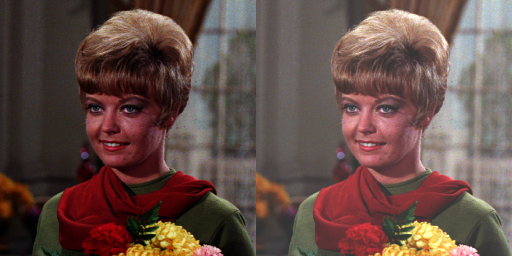

In [7]:
print ('Mengubah tingkat kecerahan citra ')
print ('---------------------------------')
try:
  brightness =  int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# Cara simple tanpa for loop
# brightness_image = cv. convertSca1eAbs(origina1, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Tugas Praktikum 1

Mengubah kontras citra 
---------------------------------
Masukkan kontras [1.0 - 3.0]: 1.5


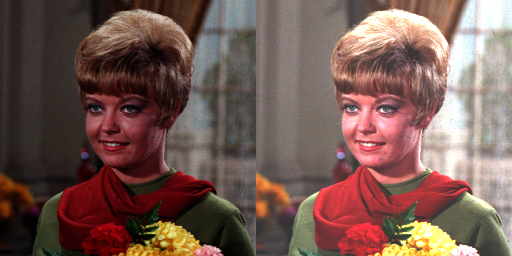

In [9]:
print ('Mengubah kontras citra ')
print ('---------------------------------')
try:
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

Tugas praktikum 2

Mengubah tingkat kecerahan citra dengan transformasi log 
---------------------------------
Masukkan nilai kecerahan: 40


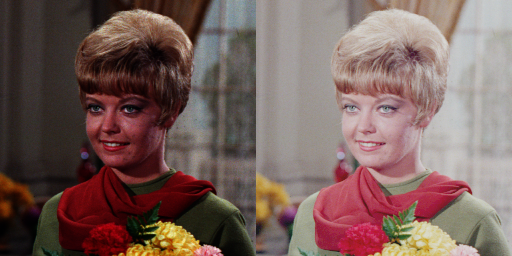

In [10]:
print ('Mengubah tingkat kecerahan citra dengan transformasi log ')
print ('---------------------------------')
try:
  translog = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/female.tiff')
translog_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      translog_image[y,x,c] = np.clip(translog * (np.log(1 + original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, translog_image))
cv2_imshow(final_frame)

Tugas Praktikum 3

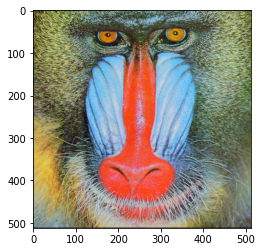

In [14]:
m = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
rgb = cv.cvtColor(m,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(rgb)

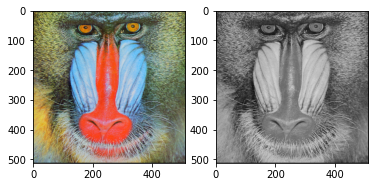

In [15]:
# Averaging
avg = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
avg[:] = avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(rgb)
ax[1].imshow(avg)

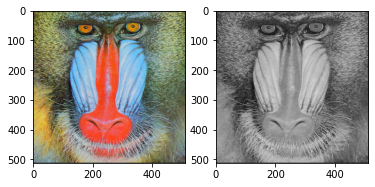

In [16]:
# Lightness
light = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
light[:] = np.max(light,axis=-1,keepdims=10)/2+np.min(light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(rgb)
ax[1].imshow(light)

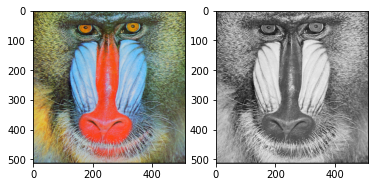

In [19]:
# Luminance
luminance = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
R, G, B = luminance[:,:,0], luminance[:,:,1], luminance[:,:,2]
gray_luminance = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(rgb)
ax[1].imshow(gray_luminance, cmap='gray')

Tugas Praktikum 4

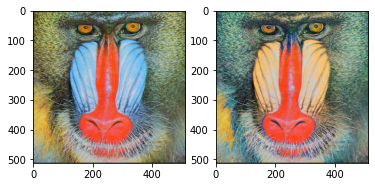

In [21]:
img_red = cv.imread('/content/drive/MyDrive/Semester 6/PCVK/image/mandrill.tiff')
ret, mask = cv.threshold(img_red[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_red)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(rgb, mask3)

gray = cv.cvtColor(img_red, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_red, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(rgb)
ax[1].imshow(out, cmap='gray')